In [1]:
%matplotlib inline

import pathlib

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

SAMPLE = 'http://proalki.uni-leipzig.de/wiki/Project:Portmanteau_Analyses'

SAMPLE_CSV = pathlib.Path('portmanteau_sample.csv')

ENCODING = 'utf-8'

RENAME = {'Quechua (Ayacucho)': 'Ayacucho',
          'Tepehuan': 'Tepehua',
          'Lakhota': 'Lakota'}

if not SAMPLE_CSV.exists():
    _sf, = pd.read_html(SAMPLE, header=0, index_col='Language')
    _sf.to_csv(SAMPLE_CSV, encoding=ENCODING)

sf = (pd.read_csv(SAMPLE_CSV, encoding=ENCODING)
      .assign(Language=lambda x: x['Language'].replace(RENAME))
      .rename(columns={'Languoid': 'Family'})
      .set_index('Language'))

sf.info()
assert sf.index.is_unique

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Ainu to Yimas
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Family      30 non-null     object 
 1   LID         29 non-null     float64
 2   LOID        30 non-null     int64  
 3   Continent   30 non-null     object 
 4   Area        30 non-null     object 
 5   Analysis    29 non-null     object 
 6   Forms       30 non-null     object 
 7   Elim        1 non-null      object 
 8   Status      30 non-null     object 
 9   Comments    8 non-null      object 
 10  Impression  22 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.8+ KB


In [2]:
df = sf.loc[sf['Status'] == 'ready', :'Analysis'].drop('LOID', axis=1)

df['LID'] = pd.to_numeric(df['LID'].fillna(0), downcast='integer')

df.head()

,Family,LID,Continent,Area,Analysis
Language,,,,,
Ainu,Ainu,12,N-C Asia,N Coast Asia,Ain/Paradigms/to X
Aleut,Aleut,18,N-C Asia,N Coast Asia,Ale/Paradigms/to X
Bella Coola,Bella Coola,995,W N America,Alaska-Oregon,Blc/Paradigms/to X
Chuckchi,Chukotkan,56,N-C Asia,N Coast Asia,Ckt/Paradigms/to X
Darai,Indo-Iranian,1399,S/SE Asia,Indic,Dry/Paradigms/to all/Npst


In [3]:
AUTOTYP = 'https://www.autotyp.uzh.ch/download/release_2013/autotyp.csv'

AUTOTYP_CSV = pathlib.Path(AUTOTYP.rpartition('/')[2])

AUTOTYP_FORMAT = {'encoding': 'utf-8',
                  'na_values': '', 'keep_default_na': False,
                  'index_col': 'LID'}

if not AUTOTYP_CSV.exists():
    _af = pd.read_csv(AUTOTYP, **AUTOTYP_FORMAT)
    _af.to_csv(AUTOTYP_CSV, encoding=AUTOTYP_FORMAT['encoding'])

af = pd.read_csv(AUTOTYP_CSV, **AUTOTYP_FORMAT)

af.info()
assert af.index.is_unique
af.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 199 to 3213
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISO639.3           2846 non-null   object 
 1   language           2913 non-null   object 
 2   alt.language.name  2873 non-null   object 
 3   language.search    2913 non-null   object 
 4   lsbranch           301 non-null    object 
 5   ssbranch           529 non-null    object 
 6   sbranch            1322 non-null   object 
 7   mbranch            2070 non-null   object 
 8   stock              2913 non-null   object 
 9   alt.stock.name     366 non-null    object 
 10  stock.search       2913 non-null   object 
 11  longitude          2913 non-null   float64
 12  latitude           2913 non-null   float64
 13  area               2913 non-null   object 
 14  continent          2913 non-null   object 
dtypes: float64(2), object(13)
memory usage: 364.1+ KB


,ISO639.3,language,alt.language.name,language.search,lsbranch,ssbranch,sbranch,mbranch,stock,alt.stock.name,stock.search,longitude,latitude,area,continent
LID,,,,,,,,,,,,,,,
199,naq,Nama,"Nama, Khoekhoe","Nama, Nama, Khoekhoe",NaN,NaN,NaN,Khoekhoe,Kwadi-Khoe,Central Khoisan,"Kwadi-Khoe, Central Khoisan",18.00,-25.50,S Africa,Africa
148,knw,!Kung,"!Xu, !Kung, \t!Hu, !Khung, !Ku, !Kung, !Xu, !X...","!Kung, !Xu, !Kung, \t!Hu, !Khung, !Ku, !Kung, ...",NaN,NaN,NaN,NaN,Ju,Northern Khoisan,"Ju, Northern Khoisan",18.00,-19.67,S Africa,Africa
94,hts,Hadza,Hadza,"Hadza, Hadza",NaN,NaN,NaN,NaN,Hadza,NaN,Hadza,35.17,-3.75,S Africa,Africa
347,sad,Sandawe,Sandawe,"Sandawe, Sandawe",NaN,NaN,NaN,NaN,Sandawe,NaN,Sandawe,35.00,-5.00,S Africa,Africa
151,kwz,Kwadi,"Kwadi, Cuepe, Curoca","Kwadi, Kwadi, Cuepe, Curoca",NaN,NaN,NaN,Kwadi,Kwadi-Khoe,Central Khoisan,"Kwadi-Khoe, Central Khoisan",12.00,-16.00,S Africa,Africa


In [4]:
af[['language','stock', 'mbranch', 'sbranch', 'area', 'continent']].nunique().to_frame('nunique')

,nunique
language,2913
stock,399
mbranch,236
sbranch,154
area,24
continent,10


In [5]:
pd.concat([af.groupby('stock').size(), af.groupby('mbranch').size()],
          axis=1, join='inner', keys=['stock', 'mbranch'])

,stock,mbranch
Chibchan,16,5
Great Andamanese,5,4
Morehead and Upper Maro Rivers,3,1


In [6]:
af['family'] = af['mbranch'].fillna(af['stock'])

af['family'].nunique()

593

In [7]:
af['family'].value_counts().to_frame('n').head()

,n
family,
Malayo-Polynesian,326
Bantoid,164
Indo-Iranian,109
West Semitic,51
Germanic,50


In [8]:
JUM = pd.Series({'ISO639.3': 'jum',  # missing in autotyp
                 'family': 'Western Nilotic',
                 'continent': 'Africa',
                 'area': 'African Savannah',
                 'longitude': 33.7494, 'latitude': 10.4349})

jf = df[['LID']].reset_index().set_index('LID').join(af).set_index('Language')
jf = jf[['ISO639.3', 'family', 'continent', 'area', 'latitude', 'longitude']]
jf.loc['Jumjum'] = JUM
assert jf.notnull().all().all()

jf.head()

,ISO639.3,family,continent,area,latitude,longitude
Language,,,,,,
Ainu,ain,Ainu,N-C Asia,N Coast Asia,43.0,143.00
Aleut,ale,Aleut,N-C Asia,N Coast Asia,54.0,-166.00
Bella Coola,blc,Salishan,W N America,Alaska-Oregon,52.5,-126.67
Chuckchi,ckt,Chukotkan,N-C Asia,N Coast Asia,67.0,170.00
Darai,dry,Indo-Iranian,S/SE Asia,Indic,24.0,84.00


In [9]:
(jf.merge(af.groupby('area').size().to_frame('n'),
          left_on='area', right_index=True)
 .sort_values(['continent', 'area'])
 .drop(['latitude', 'longitude'], axis=1))

,ISO639.3,family,continent,area,n
Language,,,,,
Jumjum,jum,Western Nilotic,Africa,African Savannah,375
Kunama,kun,Kunama,Africa,Greater Abyssinia,61
Turkana,tuv,Eastern Nilotic,Africa,S Africa,190
Maung,mph,Iwaidjan,Australia,N Australia,108
Wardaman,wrr,Wagiman - Wardaman,Australia,N Australia,108
Tepehua,tee,Totonac-Tepehuan,C America,Mesoamerica,173
Lakota,lkt,Siouan,E N America,Basin and Plains,68
Maricopa,mrc,Yuman,E N America,Basin and Plains,68
Fox,sac,Algonquian,E N America,E North America,69


In [10]:
(af.groupby(['area', 'continent'], as_index=False)['language'].count()
 .merge(jf[['area']].reset_index(), how='left', on='area')
 .set_index(['continent', 'area'])
 .sort_index()
 .query('Language != Language'))

language Language
continent        area                                  
Africa           N Africa                   28      NaN
Australia        S Australia                81      NaN
NG and Oceania   Interior New Guinea        81      NaN
                 S New Guinea               67      NaN
S America        SE South America           32      NaN
W and SW Eurasia Europe                    142      NaN
                 Greater Mesopotamia       131      NaN

In [11]:
(af.groupby('area').size().to_frame('languages')
 .merge(jf.groupby('area').size().to_frame(),
        how='left', left_index=True, right_index=True, indicator='present')
 .groupby('present', observed=False)['languages'].sum()
 .drop('right_only')
 .astype(int)
 .to_frame().T)

present,left_only,both
languages,562,2351


In [12]:
af[['family', 'continent', 'area']].nunique().to_frame('nunique')

,nunique
family,593
continent,10
area,24


In [13]:
jf[['family', 'continent', 'area']].nunique().to_frame('nunique')

,nunique
family,26
continent,9
area,17


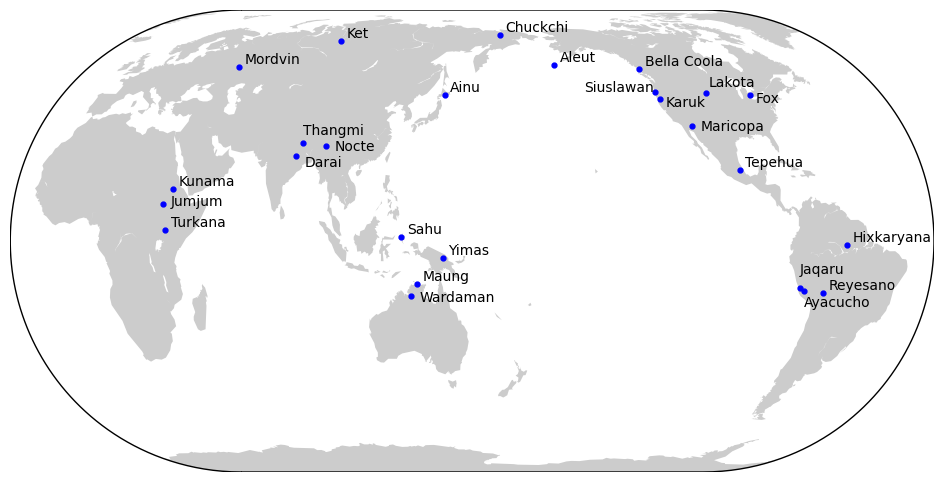

In [14]:
(fig, ax) = plt.subplots(figsize=(12, 6))

m = Basemap(ax=ax, projection='eck4', lon_0=155)
m.fillcontinents()
#m.drawparallels(range(-90, 120, 30), dashes=[], linewidth=.25, labels=[1, 0, 0, 0])
#m.drawmeridians(range(0, 360, 60), dashes=[], linewidth=.25, labels=[0, 0, 0, 1])

offsets = {'Jumjum': (3e5, -1e5),
           'Thangmi': (0, 3e5), 'Nocte': (3e5, -2e5), 'Darai': (3e5, -4e5),
           'Wardaman': (3e5, -2e5),
           'Siuslawan': (-2.6e6, 0), 'Karuk': (2e5, -3e5), 'Maricopa': (3e5, -2e5),
           'Lakota': (1e5, 2e5), 'Fox': (2e5, -3e5),
           'Jaqaru': (0, 5e5), 'Ayacucho': (0e5, -6e5)}

for l, (x, y) in jf[['longitude', 'latitude']].iterrows():
    x, y = m(x, y)
    m.plot(x, y, marker='.', color='b', markersize=7)
    xoff, yoff = offsets.get(l, (2e5, 1e5))
    ax.text(x + xoff, y + yoff, l)

#fig.savefig('map.pdf', bbox_inches='tight', pad_inches=.01)